Target communities data => exploitable data

In [14]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon
import numpy as np
import string
import matplotlib.pyplot as plt

In [15]:
df = pd.read_pickle("C:/Users/jeane/Desktop/Urban Data Hackathon/pickles/TARGET-communities-extract-wellbeing.pkl")

In [16]:
header = df[0]

In [17]:
df = pd.DataFrame(data = df, columns = header)
df = df.drop(df.index[0])
df = df[df.longitude != ""]
df = df[df.latitude != ""]
df = df[df.smell != ""]
df = df[df.noise != ""]

In [18]:
df["longitude"] = df['longitude'].apply(float)
df["latitude"] = df['latitude'].apply(float)
df["clean"] = df['clean'].apply(float)
df["smell"] = df['smell'].apply(float)
df["noise"] = df['noise'].apply(float)

In [19]:
df["noise"] = df["noise"].apply(lambda x: (x-0.5)*(-1)+0.5)
df["smell"] = df["smell"].apply(lambda x: (x-0.5)*(-1)+0.5)

In [20]:
#hapiness is calculated with clean criteria and we emphase the importance of smell and noise criterias only if they are positives
df["hapiness"] = df["clean"] - df["smell"] - df["noise"]

In [21]:
gdf = gpd.GeoDataFrame(df, geometry = [Point(float(x),float(y)) for x,y in zip(df.longitude, df.latitude)])
gdf.crs = {'init' : 'epsg:4326'}
shPoly = Polygon([(121.10157, 30.975), (121.10157, 31.514999), (121.804611, 31.514999), (121.804611, 30.975)])

Map with only "clean" criteria

<Figure size 2160x1440 with 0 Axes>

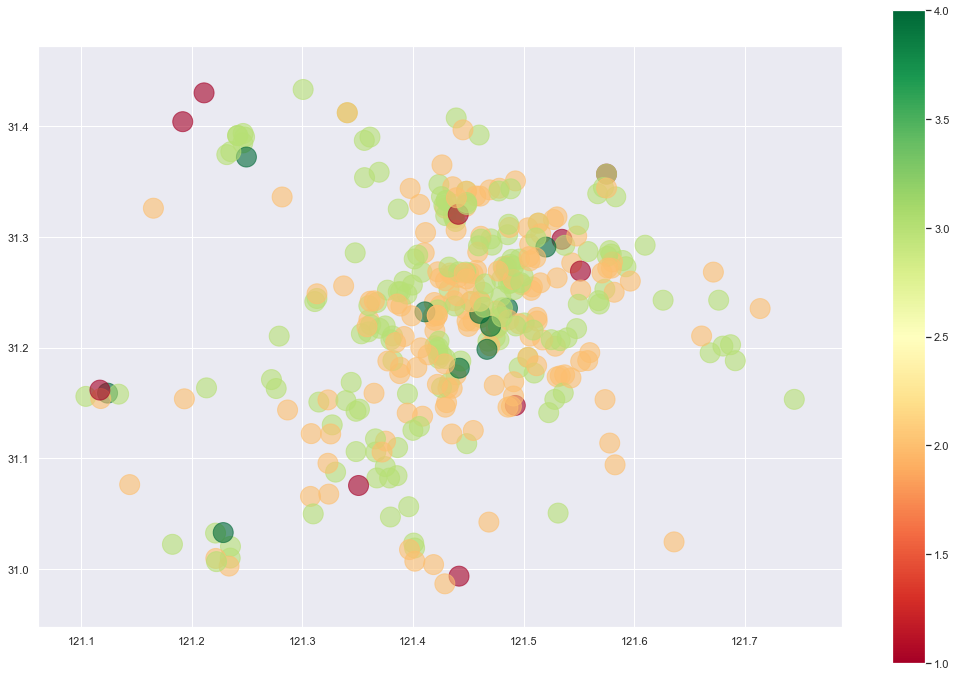

In [22]:
%matplotlib inline
sns.set()
gdf = gdf[gdf.geometry.within(shPoly)]
plt.figure(figsize=(18, 12), dpi=120)
gdf.plot(markersize=400.5, figsize=(18,12), column="clean", cmap='RdYlGn', alpha=0.6, legend=True)

Map with only "smell" criteria

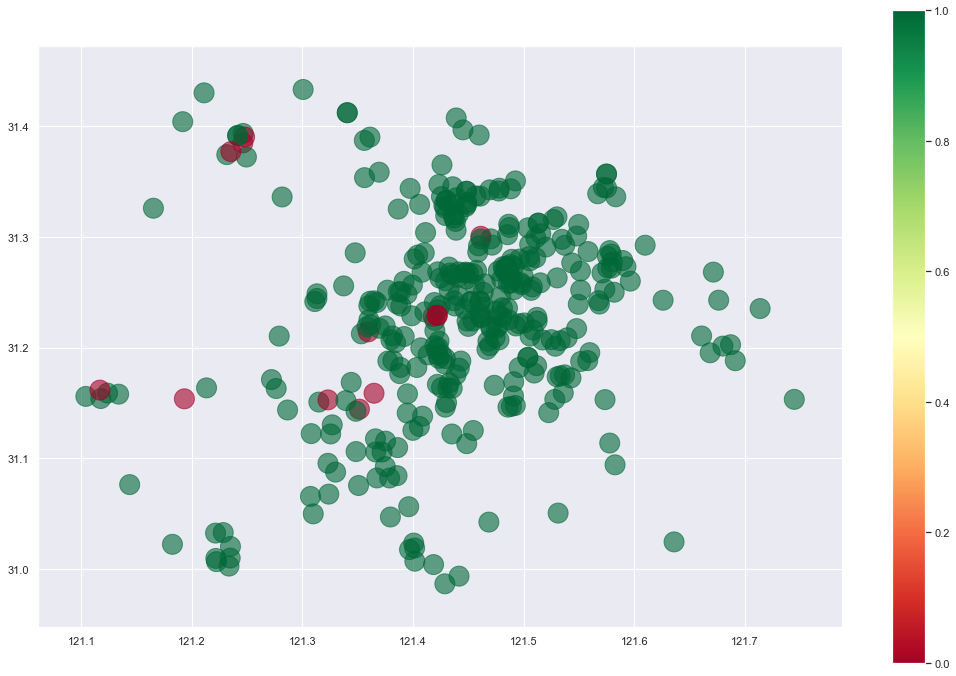

In [23]:
gdf.plot(markersize=400.5, figsize=(18,12), column='smell', cmap='RdYlGn', alpha=0.6, legend=True)

Map with only "noise" criteria

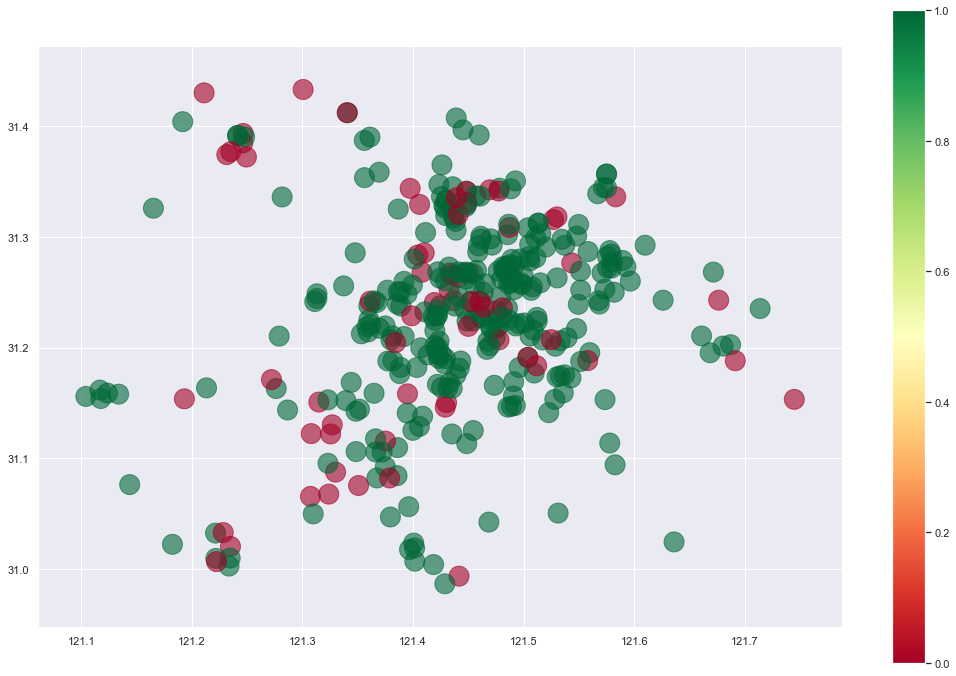

In [24]:
gdf.plot(markersize=400.5, figsize=(18,12), column='noise', cmap='RdYlGn', alpha=0.6, legend=True)

Map with all criterias

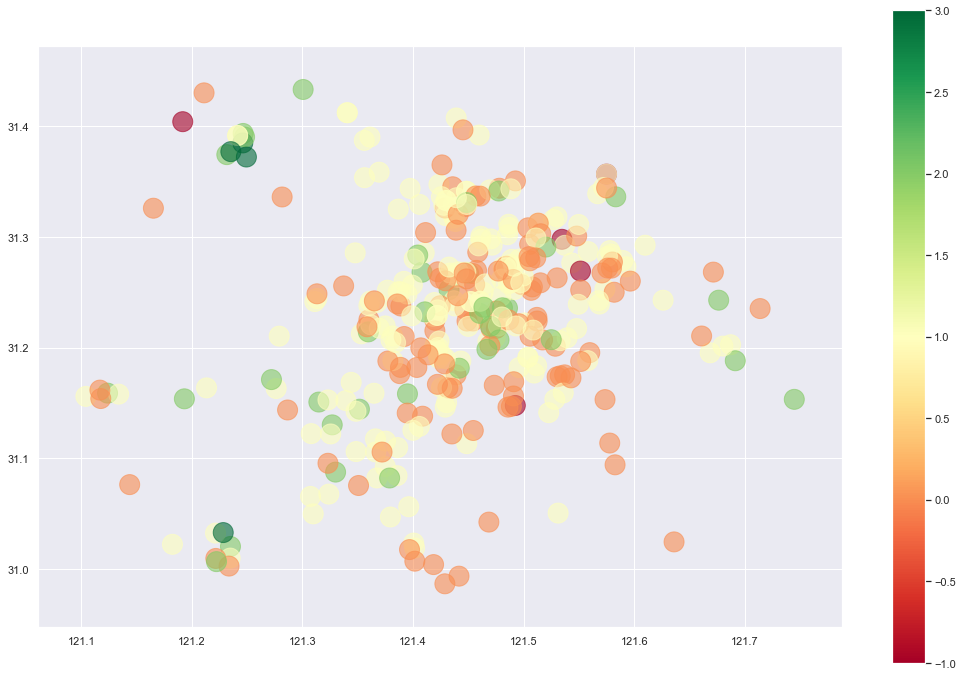

In [25]:
gdf.plot(markersize=400.5, figsize=(18,12), column='hapiness', cmap='RdYlGn', alpha=0.6, legend=True)

In [26]:
gdf.to_csv("communities.csv")

In [27]:
gdf.to_pickle("communities.pkl")